In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import itertools
from collections import OrderedDict
from matplotlib.ticker import PercentFormatter

def add_summary(data, with_as=False):
    """
    Add summary stats to a dataframe
    """
    e = "as_" if with_as else ""
    data['Total Calls'] = data[['Concordant', 'Discordant', 'Missing']].sum(axis=1)
    data['Total Genotyped'] = data['Total Calls'] - data['Missing']
    data['Missing Rate'] = data['Missing'] / data['Total Genotyped']
    data['GT Concordance'] = data['Concordant'] / data['Total Genotyped']
    data[f'{e}compP'] = data[f'{e}TP'] + data[f'{e}FP']
    data[f'{e}baseP'] = data[f'{e}TP'] + data[f'{e}FN']
    data[f'{e}compN'] = data[f'{e}TN'] + data[f'{e}FN']
    data[f'{e}baseN'] = data[f'{e}TN'] + data[f'{e}FP']
    data[f'{e}ppv'] = data[f'{e}TP'] / data[f'{e}compP']
    data[f'{e}tpr'] = data[f'{e}TP'] / data[f'{e}baseP']
    data[f'{e}tnr'] = data[f'{e}TN'] / data[f'{e}baseN']
    data[f'{e}npv'] = data[f'{e}TN'] / data[f'{e}compN']
    data[f'{e}acc'] = (data[f'{e}TP'] + data[f'{e}TN']) / (data[f'{e}baseP'] + data[f'{e}baseN'])
    data[f'{e}ba'] = (data[f'{e}tpr'] + data[f'{e}tnr']) / 2
    data[f'{e}f1'] = 2 * ((data[f'{e}ppv'] * data[f'{e}tpr']) / (data[f'{e}ppv'] + data[f'{e}tpr']))

bdir = "../results/tables/"
gt_data = pd.read_csv(bdir + "/all.gt_dist.table.txt", sep='\t')
inter_data = pd.read_csv(bdir + "/all.intersect.table.txt", sep='\t')
neigh_data = pd.read_csv(bdir + "/all.neighbor.table.txt", sep='\t')
svtype_data = pd.read_csv(bdir + "/all.svtype.table.txt", sep='\t')

tr_gt_data = pd.read_csv(bdir + "/tr.gt_dist.table.txt", sep='\t')
tr_inter_data = pd.read_csv(bdir + "/tr.intersect.table.txt", sep='\t')
tr_neigh_data = pd.read_csv(bdir + "/tr.neighbor.table.txt", sep='\t')
tr_svtype_data = pd.read_csv(bdir + "/tr.svtype.table.txt", sep='\t')

ntr_gt_data = pd.read_csv(bdir + "/non_tr.gt_dist.table.txt", sep='\t')
ntr_inter_data = pd.read_csv(bdir + "/non_tr.intersect.table.txt", sep='\t')
ntr_neigh_data = pd.read_csv(bdir + "/non_tr.neighbor.table.txt", sep='\t')
ntr_svtype_data = pd.read_csv(bdir + "/non_tr.svtype.table.txt", sep='\t')

# Overview Table

In [2]:
inter_data['Filtered'] = 0
add_summary(inter_data, True)

In [8]:
view = inter_data[(inter_data['experiment'].isin(['tm', 'dm']))
                 & (inter_data['coverage'] == '32x')]

In [9]:
view.groupby(['program', 'experiment'])[['GT Concordance', 'TP-base', 'TP-comp', 'FP', 'FN', 'precision', 'recall', 'f1']].mean()

GT Concordance       TP-base       TP-comp  \
program  experiment                                               
cutesv   dm                0.781145  20864.319149  18365.297872   
         tm                0.127859  22927.808511  22981.404255   
kanpig   dm                0.849293  21571.489362  20316.702128   
         tm                0.866194  22671.319149  21640.234043   
sniffles dm                0.338679  24040.936170  22542.808511   
         tm                0.122663  24885.702128  24985.723404   
svjedi   dm                0.554398  22781.702128  21367.085106   
         tm                0.428069  25153.063830  25316.553191   

                                FP           FN  precision    recall        f1  
program  experiment                                                             
cutesv   dm             506.872340  1944.297872   0.973024  0.914650  0.942895  
         tm          104494.978723  1051.468085   0.180129  0.956104  0.303015  
kanpig   dm            1022.723404  1246.021277   0.951864  0.945392  0.948604  
         tm             597.851064  1129.340426   0.973004  0.952527  0.962648  
sniffles dm           28567.361702   808.744681   0.440539  0.967418  0.605217  
         tm          121393.510638   762.553191   0.170554  0.970223  0.290001  
svjedi   dm            8809.659574   751.106383   0.707312  0.968049  0.817278  
         tm           19514.553191   326.978723   0.564100  0.987122  0.717764

/Users/english/py/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/english/py/lib/python3.9/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)


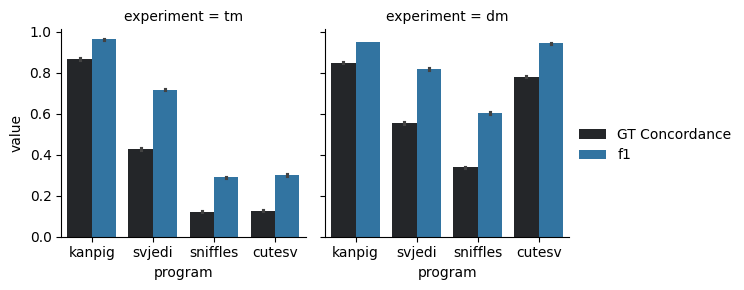

In [31]:
view2 = view.melt(id_vars=['program', 'experiment'], value_vars=['GT Concordance', 'f1'])
f = sb.FacetGrid(view2, col='experiment')
f.map_dataframe(sb.barplot, x='program', y='value', hue='variable')
f.add_legend()

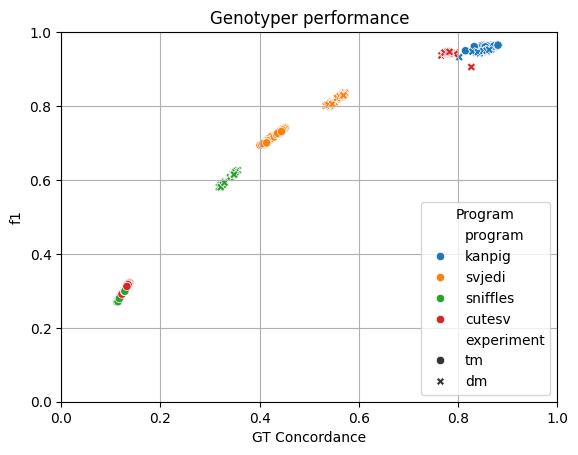

In [10]:
p = sb.scatterplot(data=view, x='GT Concordance', y='f1', hue='program', style='experiment')
p.set(xlim=(0,1), ylim=(0,1), title="Genotyper performance")
plt.legend(loc="lower right", title="Program")
plt.grid(axis='both')

# Genotype Distribution

In [6]:
import joblib
b = joblib.load("/Users/english/code/kanpig_experiments/manuscript/explore_section09/gtcnts.jl")
mean = np.sum(b, axis=1)
mean[0] = mean[3]
mean[3] = 0
mean = mean[:4]

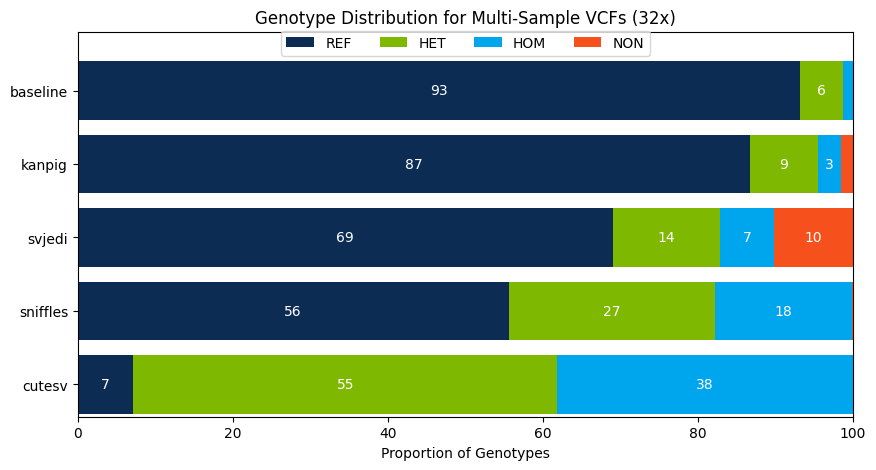

In [7]:
tests = ['cutesv', 'sniffles', 'svjedi', 'kanpig', 'baseline']

m_data = OrderedDict()

# Bottom up order
view = gt_data[(gt_data['coverage'] == '32x') 
               & (gt_data['technology'] == 'pac')
              & (gt_data['experiment'].isin(['dm', 'truth']))]
for i in tests:
    m_data[(i, 'pac')] = view[view['program'] == i][['REF', 'HET', 'HOM', 'NON']].sum()

m_data[('baseline', 'pac')] = mean
#data[('exbaseline', '')] = [17937331 , 1079127, 233567, 0]

# Normalize the data by percentages for each test and observation
normalized_data = OrderedDict()
y_labels = []
y_super = []
for key, counts in m_data.items():
    total = np.sum(counts)
    normalized_data[key] = (counts / total) * 100

    y_labels.append(key[0])
    if key[1] not in y_super:
        y_super.append(key[1])

# Plotting
fig, ax = plt.subplots(figsize=(10, 5))
bar_width = .6
y_positions = []

# Define colors for each category
colors = ['#0D2C54', '#7FB800', '#00A6ED', '#F6511D']
categories = ['REF', 'HET', 'HOM', 'NON']

# Plot each test and observation
y_pos = -.75
for i, ((test, observation), counts) in enumerate(normalized_data.items()):
    y_pos += .75
    y_positions.append(y_pos)
    left = 0
    for j, (count, color, category) in enumerate(zip(counts, colors, categories)):
        ax.barh(y_pos, count, left=left, color=color, height=bar_width, label=category if y_pos == 0 else "")
        if count > 1.5:  # Only add text if the percentage is greater than 5
            ax.text(left + count / 2, y_pos, f'{count:.0f}', va='center', ha='center', color='white')
        left += count

# Adding labels and title
ax.set_yticks(y_positions)
ax.set_yticklabels(y_labels)
ax.set_ylim((-.33, max(y_positions) + .6))
ax.set_xlabel('Proportion of Genotypes')
ax.set_title('Genotype Distribution for Multi-Sample VCFs (32x)')

# Adjusting the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:len(categories)], labels[:len(categories)], 
          loc="upper center", bbox_to_anchor=(0.5, 1.021), ncol=len(categories))
#sb.despine(fig)
plt.show()


In [8]:
pd.DataFrame(normalized_data)

,cutesv,sniffles,svjedi,kanpig,baseline
,pac,pac,pac,pac,pac
REF,57.214676,44.231856,68.926018,88.046906,93.180819
HET,19.301544,27.542972,10.010251,4.881292,5.605847
HOM,23.483781,27.760796,5.304779,1.534727,1.213333
NON,0.000000,0.464376,15.758952,5.537075,0.000000


# Number of Neighbors

In [53]:
import pysam
import truvari
v = pysam.VariantFile("../explore_section09/local_test/dipcall_bcftools_merge_neigh.vcf.gz")
all_neigh = []
for entry in v:
    if entry.chrom in ['chrX', 'chrY']:
        continue
    sz = truvari.entry_size(entry)
    if sz < 50 or sz > 10000:
        continue
    n = entry.info['NumNeighbors']
    all_neigh.append(min(n, 10))

In [54]:
from collections import Counter
cnt = Counter(all_neigh)
cnt = pd.DataFrame([cnt]).T.reset_index()
cnt.columns = ['num_neigh', 'count']
cnt['percent of calls'] = cnt['count'] / cnt['count'].sum()
cnt.sort_values(by=['num_neigh'], inplace=True)

In [55]:
tot = cnt['count'].sum()
tot, tot - cnt.iloc[0]['count'], 1 - (cnt.iloc[0]['count'] / tot)

(403031, 371771.0, 0.922437728115207)

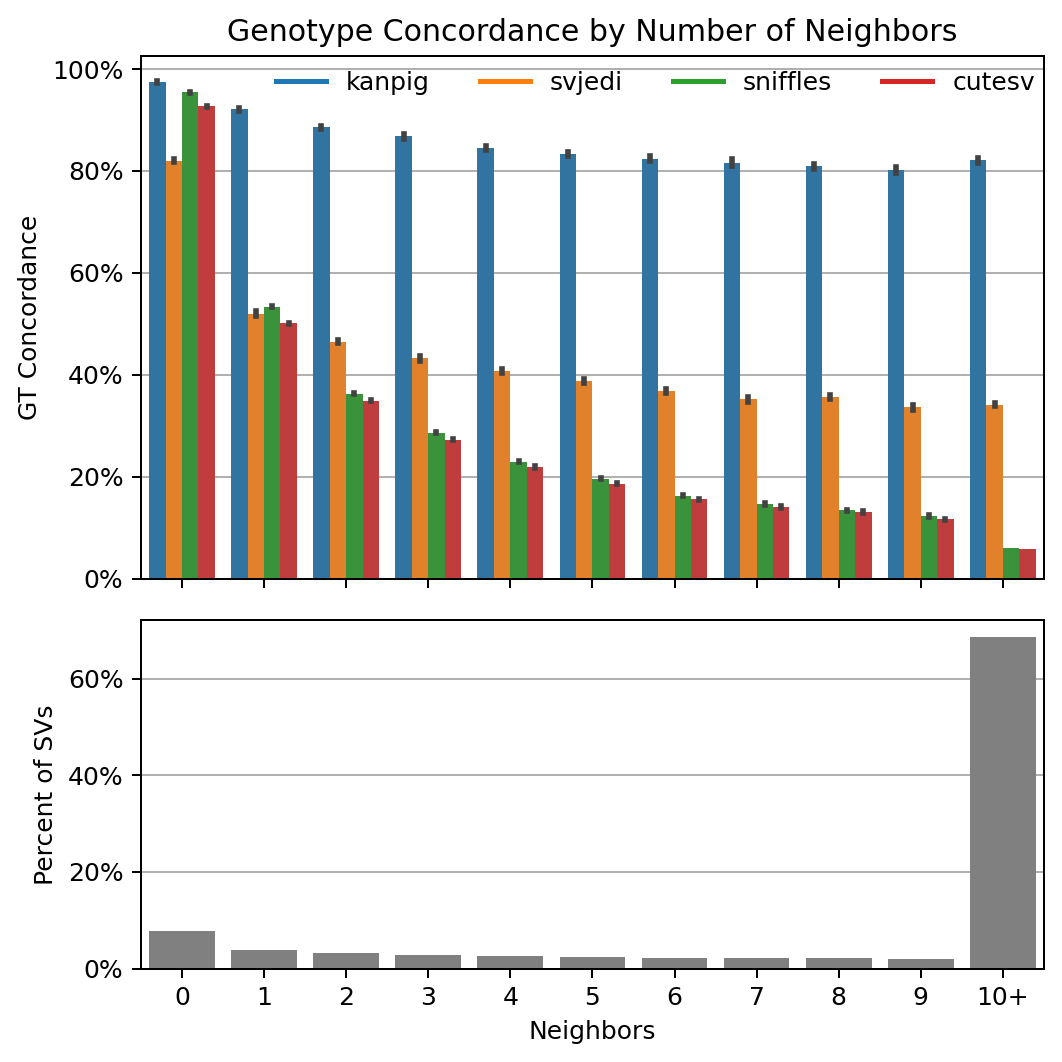

In [61]:
add_summary(neigh_data)

yvar = "GT Concordance"
experiment = "tm"
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 6), dpi=180,
                              gridspec_kw={'height_ratios': [3, 2]})  # figsize is (width, height)

view = neigh_data[(neigh_data['experiment'] == experiment) 
                  & (neigh_data['technology'] == 'pac')
                 & (neigh_data['coverage'] == '32x')]
lineplot = sb.barplot(data=view, ax=ax1,
                       x="num_neigh", y=yvar, 
                       hue="program",
                      hue_order=['kanpig', 'svjedi', 'sniffles', 'cutesv'],
                     zorder=2)
lineplot.yaxis.set_major_formatter(PercentFormatter(1, decimals=0))
hue_labels = ['kanpig', 'svjedi', 'sniffles', 'cutesv']
#styles = ['solid', 'dashed']
#style_labels = neigh_data['Technology'].unique()

# Get handles and labels for both hue and style
handles, _ = lineplot.get_legend_handles_labels()

# Create legend elements
hue_elements = [plt.Line2D([0], [0], color=sb.color_palette()[i], lw=2) for i in range(len(hue_labels))]
#style_elements = [plt.Line2D([0], [0], color='black', linestyle=styles[i], lw=2) for i in range(len(style_labels))]

# Combine elements
legend_elements = hue_elements #+ style_elements
legend_labels = list(hue_labels) #+ list(style_labels)

lineplot.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
lineplot.set_xticklabels(["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10+"])
lineplot.set(title="Genotype Concordance by Number of Neighbors", 
             xlabel="", 
             ylabel="GT Concordance")
# Create custom legend
ax1.legend(legend_elements, legend_labels, title='', ncol=4, loc='upper right', 
           bbox_to_anchor=(1.015, 1.015), frameon=False)
ax1.grid(axis='y', zorder=1)

hist = sb.barplot(data=cnt, x="num_neigh", y="percent of calls", zorder=2, color='#808080')
hist.set(ylabel="Percent of SVs", xlabel="Neighbors")
hist.yaxis.set_major_formatter(PercentFormatter(1, decimals=0))
ax2.grid(axis='y', zorder=1)
fig.tight_layout()

# Overall Plot

In [22]:
YMIN,YMAX = 0,1
def add_summary(data, with_as=False):
    """
    Add summary stats to a dataframe
    """
    e = "as_" if with_as else ""
    data['Total Calls'] = data[['Concordant', 'Discordant', 'Missing', 'Filtered']].sum(axis=1)
    data['Total Genotyped'] = data['Total Calls'] - data['Missing']
    data['Missing Rate'] = data['Missing'] / data['Total Genotyped']
    data['GT Concordance'] = data['Concordant'] / data['Total Genotyped']
    data[f'{e}compP'] = data[f'{e}TP'] + data[f'{e}FP']
    data[f'{e}baseP'] = data[f'{e}TP'] + data[f'{e}FN']
    data[f'{e}compN'] = data[f'{e}TN'] + data[f'{e}FN']
    data[f'{e}baseN'] = data[f'{e}TN'] + data[f'{e}FP']
    data[f'{e}ppv'] = data[f'{e}TP'] / data[f'{e}compP']
    data[f'{e}tpr'] = data[f'{e}TP'] / data[f'{e}baseP']
    data[f'{e}tnr'] = data[f'{e}TN'] / data[f'{e}baseN']
    data[f'{e}npv'] = data[f'{e}TN'] / data[f'{e}compN']
    data[f'{e}acc'] = (data[f'{e}TP'] + data[f'{e}TN']) / (data[f'{e}baseP'] + data[f'{e}baseN'])
    data[f'{e}ba'] = (data[f'{e}tpr'] + data[f'{e}tnr']) / 2
    data[f'{e}f1'] = 2 * ((data[f'{e}ppv'] * data[f'{e}tpr']) / (data[f'{e}ppv'] + data[f'{e}tpr']))
    
def plot_gtconcordance_barplot(subset, ax, title="Genotype Concordance"):
    p = sb.barplot(data=subset, x="program", y="GT Concordance", hue="coverage", 
                   hue_order=['32x', '16x', '8x'], ax=ax, zorder=2)
    p.set(title=title, ylabel="Overall GT Concordance")

    categories = subset['program'].unique()
    num_categories = len(categories)

    # Alternate shading for every other category
    for i in range(0, num_categories, 2):
        p.axvspan(i - 0.5, i + 0.5, color='gray', alpha=0.1)

    # Adjust x-axis limits if needed
    p.set_xlim(-0.5, num_categories - 0.5)
    p.set_ylim(YMIN, YMAX)
    ax.grid(axis='y', zorder=1)
    legend = p.legend(frameon=True, title='Coverage', loc='upper right')
    legend.get_frame().set_edgecolor('white')
    
def plot_typestrat(subset_a, subset_b, ax1, ax2):
    """
    A is TRs, B is Non-TRs
    """
    p = sb.barplot(data=subset_a, x="program", y="GT Concordance", hue="svtype", 
                   hue_order=['DEL', 'INS'], order=['kanpig', 'svjedi', 'sniffles', 'cutesv'],
                   zorder=2, ax=ax1)


    categories = subset_a['program'].unique()
    num_categories = len(categories)

    # Alternate shading for every other category
    for i in range(0, num_categories, 2):
        p.axvspan(i - 0.5, i + 0.5, color='gray', alpha=0.1)

    # Adjust x-axis limits if needed
    p.set_xlim(-0.5, num_categories - 0.5)
    p.set_ylim(YMIN, YMAX)
    ax1.grid(axis='y', zorder=1)
    legend = p.legend(frameon=True, title='SV Type', ncol=1, loc='upper right')
    legend.get_frame().set_edgecolor('white')
    ax1.set(ylabel="SVTYPE GT Concordance")

    ## Second half
    p = sb.barplot(data=subset_b, x="program", y="GT Concordance", hue="TR", 
                   hue_order=['inside', 'outside'], order=['kanpig', 'svjedi', 'sniffles', 'cutesv'],
                   zorder=2, ax=ax2)


    p.set(xlabel="Program", ylabel="TR GT Concordance")

    categories = subset_a['program'].unique()
    num_categories = len(categories)

    # Alternate shading for every other category
    for i in range(0, num_categories, 2):
        p.axvspan(i - 0.5, i + 0.5, color='gray', alpha=0.1)

    # Adjust x-axis limits if needed
    p.set_xlim(-0.5, num_categories - 0.5)
    p.set_ylim(YMIN, YMAX)
    ax2.grid(axis='y', zorder=1)
    #legend = p.legend(frameon=True, title='SV Type', loc='upper right')
    #legend.get_frame().set_edgecolor('white')
    


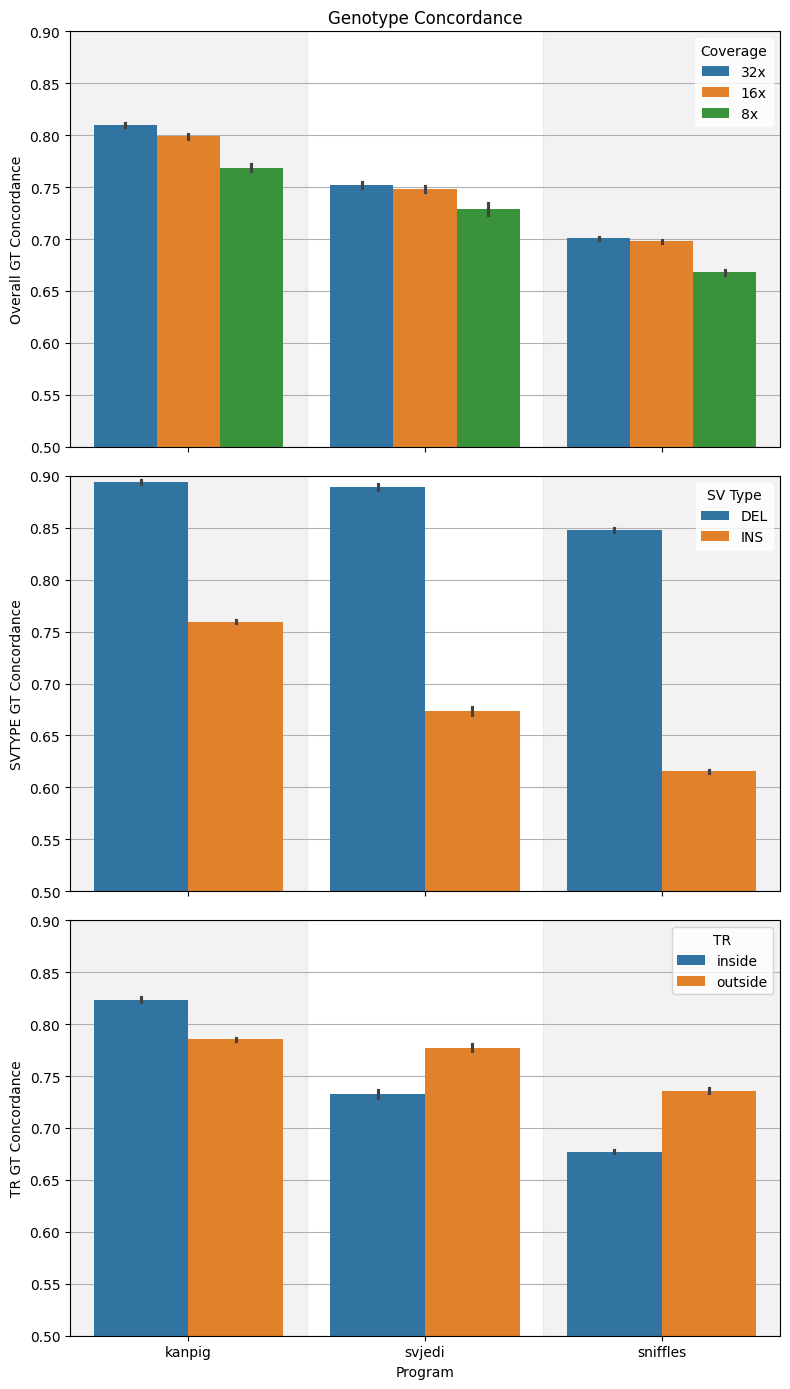

In [12]:
add_summary(svtype_data)
add_summary(tr_svtype_data)
add_summary(ntr_svtype_data)

exp = 'tm'

view = svtype_data[(svtype_data['svtype'] == 'TOT')
                    & (svtype_data['experiment'] == exp)
                    & (svtype_data['technology'] == 'pac')]

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(8, 14))

plot_gtconcordance_barplot(view, ax1, "Genotype Concordance")

a = svtype_data[(tr_svtype_data['svtype'] != 'TOT')
                   & (svtype_data['experiment'] == exp)
                   & (svtype_data['technology'] == 'pac')
                   & (svtype_data['coverage'] == '32x')]

b = tr_svtype_data[(tr_svtype_data['svtype'] == 'TOT')
                   & (tr_svtype_data['experiment'] == exp)
                   & (tr_svtype_data['technology'] == 'pac')
                   & (tr_svtype_data['coverage'] == '32x')].copy()
b['TR'] = 'inside'
c = ntr_svtype_data[(ntr_svtype_data['svtype'] == 'TOT')
                   & (ntr_svtype_data['experiment'] == exp)
                   & (ntr_svtype_data['technology'] == 'pac')
                   & (ntr_svtype_data['coverage'] == '32x')].copy()
c['TR'] = 'outside'
d = pd.concat([b, c])

plot_typestrat(a, d, ax2, ax3)
fig.tight_layout()
plt.show()


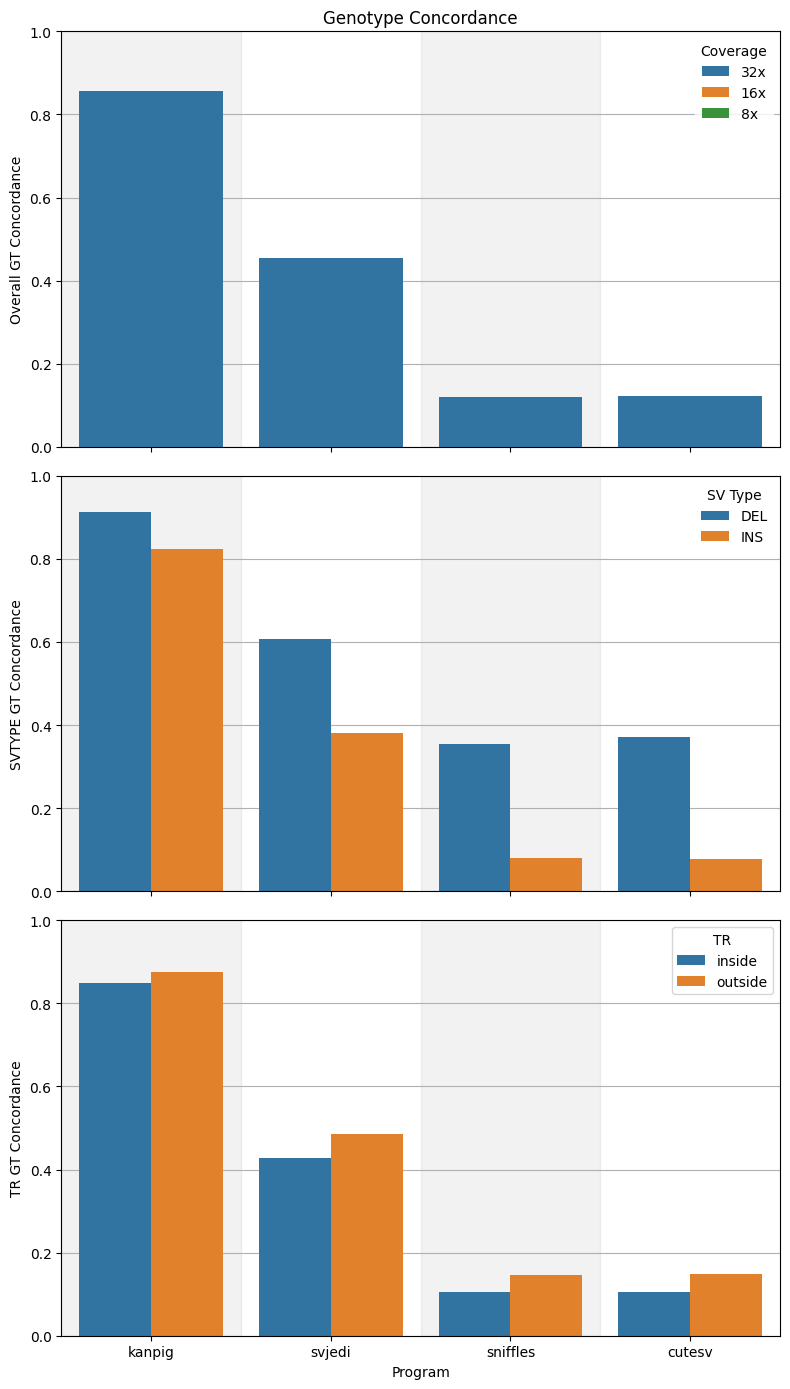

In [23]:
add_summary(svtype_data)
add_summary(tr_svtype_data)
add_summary(ntr_svtype_data)

exp = 'tm'

view = svtype_data[(svtype_data['svtype'] == 'TOT')
                    & (svtype_data['experiment'] == exp)
                    & (svtype_data['technology'] == 'pac')]

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(8, 14))

plot_gtconcordance_barplot(view, ax1, "Genotype Concordance")

a = svtype_data[(tr_svtype_data['svtype'] != 'TOT')
                   & (svtype_data['experiment'] == exp)
                   & (svtype_data['technology'] == 'pac')
                   & (svtype_data['coverage'] == '32x')]

b = tr_svtype_data[(tr_svtype_data['svtype'] == 'TOT')
                   & (tr_svtype_data['experiment'] == exp)
                   & (tr_svtype_data['technology'] == 'pac')
                   & (tr_svtype_data['coverage'] == '32x')].copy()
b['TR'] = 'inside'
c = ntr_svtype_data[(ntr_svtype_data['svtype'] == 'TOT')
                   & (ntr_svtype_data['experiment'] == exp)
                   & (ntr_svtype_data['technology'] == 'pac')
                   & (ntr_svtype_data['coverage'] == '32x')].copy()
c['TR'] = 'outside'
d = pd.concat([b, c])

plot_typestrat(a, d, ax2, ax3)
fig.tight_layout()
plt.show()
